In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import robot as Robot
import  time

robot_Instance= Robot.Robot_Class(0,0,0)


In [3]:
robot_Instance.Connect_TCP()

Trying to connect
Connected


In [15]:
robot_Instance.camera.close()

In [ ]:

import numpy as np
import math
import  time, sys , serial
import threading
from collections import deque
from Serial_ import *
from parse import *
import TCP_IP as Tcp_Ip
import cv2 as cv
import picamera
from fct import * 
from IPython.display import Image
start=time.time()
robot_Instance.camera.capture(robot_Instance.stream, format='jpeg', use_video_port = True)
robot_Instance.stream.seek(0)
file_bytes = np.asarray(bytearray(robot_Instance.stream.read()), dtype=np.uint8)

img = cv.imdecode(file_bytes, cv.IMREAD_COLOR)
print("total time capture image: ", time.time() - start)
Robot_Pos=robot_Instance.beacon_main(img)
print("total time post math: ", time.time() - start)
print("Beacon",Robot_Pos)
rawImage = img

height,width,depth = rawImage.shape
boundaries = [
 ([0, 0, 180], [255, 153, 255], 'r', (0,0,255), (0,8000)),
 ([230, 141, 0], [255, 225, 255], 'b', (255,0,0), (8000,0)),
 ([0, 200, 97], [255, 255, 255], 'y', (0,255,255), (0,0)),
 ([77, 235, 0], [220, 244, 255], 'g', (0,255,0), (8000,8000))
]
start = time.time()
center_circles = (532, 357)
center_beacon = (541,357)
start=time.time()


start = time.time()
Image(img1)



total time capture image:  0.4277513027191162
r  not found.
g  not found.
[50.40379136024971, 52.076378177636805] [(8000, 0), (0, 0)]
less than 3 lights found
total time post math:  1.5055530071258545
Beacon (0.0, 0.0, 0.0, array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0

In [4]:
Init=[1000,1000,90,15]
Spot_Init=[Init[0],Init[1],0,15]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Set_Max_Try_Single_Goal(12)

G92 X1000 Y1000 A90 



In [ ]:
robot_Instance.Empty_TCP()
robot_Instance.Start_Collector()

Spot_List =[Spot_Init,[1000,2600,0,15],[6500,2600,0,15],[6500,5000,0,15],[4500,5000,0,15],[4500,7500,0,15],[4500,5000,0,15],[7500,5000,0,15],[2500,500,0,15],[2500,4000,0,15],[7000,4000,0,15],[3500,1500,0,15],[700,3500,0,15],[5500,3500,0,15],[5500,4200,0,15],[700,4200,0,15]]
for Spot in Spot_List:
    robot_Instance.Update_Robot_Position_From_Beacon()
    Bottle_N=0
    robot_Instance.Sensor_Enabled=Spot[3]
    print('Spot : ', Spot)
    robot_Instance.Clear_Read_Buffer()
    robot_Instance.Clear_Bottle_List()
    robot_Instance.Go_To(Spot[0],Spot[1],Spot[2])
    #Robot is now arrived to a position
    Data=robot_Instance.Get_Data_TCP()#Collect bottles from TCP Communication
    print('Data Received TCP:', Data)
    while Bottle_N<3:#Try to catch 3 Bottle
        List=robot_Instance.Update_Bottle_List(Data)#Update our internal lsit
        Bottle_List= robot_Instance.Get_Bottle_List()
        if Bottle_List!=[]:
            Bottle_X, Bottle_Y, Bottle_Score= robot_Instance.Get_Nearest_Bottle()
            if Bottle_X!=None and Bottle_Y!= None and Bottle_Score!=None:
                Bottle_X_Extended, Bottle_Y_Extended, Valid=robot_Instance.Extend_Coordinate((Bottle_X, Bottle_Y),Distance=800)
                print('Bottle selected:', Bottle_X,Bottle_Y,Bottle_Score, ' Extended', Bottle_X_Extended,Bottle_Y_Extended)
                if Valid:
                    robot_Instance.Go_To(Bottle_X,Bottle_Y,Bottle_Score)
                    robot_Instance.Add_Bottle_Collected()
                    Bottle_N=Bottle_N+1
                else:
                    robot_Instance.Clean_Bottle_Of_Position((Bottle_X, Bottle_Y))
            else:# No more bottle
                print('No bottle')
                break;
        else:
            print("Empty List")
            break;
    if(robot_Instance.Get_Bottle_Collected()>8):
        robot_Instance.Go_To(2000,2000,1)
        robot_Instance.Update_Robot_Position_From_Beacon()
        robot_Instance.Go_To(2000,2000,1)
        robot_Instance.Update_Robot_Position_From_Beacon()
        robot_Instance.Go_To(1000,1000,0)
        robot_Instance.Update_Robot_Position_From_Beacon()
        robot_Instance.Go_To(500,500,0, Avoidance=False)
        robot_Instance.Set_Robot_Speed(150, Transmission= True)
        robot_Instance.Reverse_Collector()
        robot_Instance.Clear_Read_Buffer()
        robot_Instance.Go_To(1000,1000,1,Path_Checking=False,Avoidance=False)
        robot_Instance.Set_Robot_Speed(500, Transmission= True)
        robot_Instance.Start_Collector()
        robot_Instance.Clear_Read_Buffer()
        #Reverse collector
        robot_Instance.Reset_Bottle_Collected()

robot_Instance.Go_To(2000,2000,1)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(2000,2000,1)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(1000,1000,0)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(500,500,0, Avoidance=False)
robot_Instance.Set_Robot_Speed(150, Transmission= True)
robot_Instance.Reverse_Collector()
robot_Instance.Clear_Read_Buffer()
robot_Instance.Go_To(1000,1000,1,Path_Checking=False,Avoidance=False)
robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Clear_Read_Buffer()
#Reverse collector
robot_Instance.Reset_Bottle_Collected()

{'m': 0, 'b': 0, 'd': 0, 'l': 0, 'i': 0, 'k': 0, 'g': 0, 'c': 0, 'h': 0, 'e': 0, 'j': 0, 'a': 0, 'f': 0}
Message  M0 X1902.03 Y2267.29 A-67.33 T1 S0

Timeout
Try Again
{'m': 0, 'b': 0, 'd': 0, 'l': 0, 'i': 0, 'k': 0, 'g': 0, 'c': 0, 'h': 0, 'e': 0, 'j': 0, 'a': 0, 'f': 0}
Message  M0 X1966.61 Y2108.88 A-69.42 T1 S0

Timeout
total time capture image:  0.6693193912506104
[-177.19019186392956, 56.309932474020215, -67.73600488258145, -68.69734422251713] [(0, 8000), (8000, 0), (0, 0), (8000, 8000)]
Beacon worked!
total time post math:  1.560563325881958
G92 X2199 Y1777 A287 

2199.4723362424866 1776.6691416220194 286.65480483316753
{'m': 0, 'b': 0, 'd': 0, 'l': 0, 'i': 0, 'k': 0, 'g': 0, 'c': 0, 'h': 0, 'e': 0, 'j': 0, 'a': 0, 'f': 0}
Message  M0 X1214.04 Y1043.67 A194.53 T1 S0

Timeout
Try Again
{'m': 0, 'b': 0, 'd': 0, 'l': 0, 'i': 0, 'k': 0, 'g': 0, 'c': 0, 'h': 0, 'e': 0, 'j': 0, 'a': 0, 'f': 0}
Message  M0 X1094.22 Y1014.81 A192.11 T1 S0

Timeout
total time capture image:  0.6683027744

In [11]:
Init=[1000,1000,0,15]
Spot_Init=[Init[0],Init[1],Init[2], Init[3]]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
time.sleep(0.1)
robot_Instance.Set_Robot_Speed(500, Transmission= True)
time.sleep(0.1)

robot_Instance.Set_Max_Try_Single_Goal(12)
robot_Instance.Empty_TCP()
Spot_List =[Spot_Init,[4000,1000,0,15]]
for Spot in Spot_List:
    Bottle_N=0
    robot_Instance.Sensor_Enabled=Spot[3]
    robot_Instance.Go_To(Spot[0],Spot[1],Spot[2], Avoidance=True)
    print(Spot)


G92 X1000 Y1000 A0 

Unconnected
[1000, 1000, 0, 15]
{'a': 0, 'd': 0, 'e': 0, 'g': 0, 'i': 0, 'm': 0, 'k': 0, 'b': 0, 'l': 0, 'j': 0, 'h': 0, 'c': 0, 'f': 0}
Message  M0 X3476.44 Y1822.20 A-132.71 T1 S0

Timeout
Message OK: D_Profil S=500 A=50 B=100 

{'a': 0, 'd': 0, 'e': 0, 'g': 0, 'i': 0, 'm': 1, 'k': 0, 'b': 0, 'l': 0, 'j': 0, 'h': 0, 'c': 0, 'f': 0}
Message  M0 X1467.07 Y1003.63 A0.78 T2 S4096

Blocked
{'a': 0, 'd': 1, 'e': 0, 'g': 0, 'i': 0, 'm': 0, 'k': 0, 'b': 0, 'l': 0, 'j': 0, 'h': 0, 'c': 0, 'f': 0}
Message  M0 X1348.85 Y1012.88 A0.33 T2 S8

Blocked
{'a': 0, 'd': 0, 'e': 0, 'g': 0, 'i': 0, 'm': 0, 'k': 0, 'b': 0, 'l': 0, 'j': 0, 'h': 0, 'c': 0, 'f': 0}
Message  M0 X1462.52 Y923.57 A-71.16 T1 S0

Timeout
{'a': 0, 'd': 0, 'e': 0, 'g': 0, 'i': 0, 'm': 0, 'k': 0, 'b': 0, 'l': 0, 'j': 0, 'h': 0, 'c': 0, 'f': 0}
Message  M0 X1476.88 Y785.76 A-91.45 T1 S0

Timeout
{'a': 0, 'd': 0, 'e': 0, 'g': 0, 'i': 0, 'm': 0, 'k': 0, 'b': 0, 'l': 0, 'j': 0, 'h': 0, 'c': 0, 'f': 0}
Message  M0 X3

In [3]:
Init=[2000,200,90,15]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
robot_Instance.Start_Collector()
robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Clear_Read_Buffer()
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow X coordinate
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7600,Y_Cal=200,A_Cal=0, Detection=False, Calibration=True)#Recalibrate Top of the ramp
robot_Instance.Go_To(7000,200,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7800,1000,0,Path_Checking=False,Avoidance=False)#Turn left

robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow Y coordintae

robot_Instance.Go_To_Speed(600,640,20000, Detection=True)
print(robot_Instance.Get_Robot_Position())

robot_Instance.Go_To_Speed(100,100,800,X_Cal=7500,Y_Cal=7700,A_Cal=90, Detection=False, Calibration=True)#Recalibrate Top of the ramp, Step1
robot_Instance.Disable_All_Sensors()
robot_Instance.Go_To(7500,7200,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7000,7200,0,Path_Checking=False,Avoidance=False)#Move backward right so we can recalibrate at the top of the ramp
robot_Instance.Go_To_Speed(-320,-300,10000, Detection=True)#Go against wall
robot_Instance.Go_To_Speed(-100,-100,1500,X_Cal=7900,A_Cal=180, Detection=False, Calibration=True)#Recalibrate Corner paltform
robot_Instance.Go_To(5400,7500,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7000,0,Path_Checking=False,Avoidance=False)#In front of stairs
robot_Instance.Go_To(7000,6500,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,7600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7000,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7500,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7800,7600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(420,400,20000, Detection=True)#Calibrate Top of the ramp
robot_Instance.Go_To_Speed(100,100,1200,X_Cal=7700,Y_Cal=7750,A_Cal=0, Detection=False, Calibration=True)

robot_Instance.Go_To(7300,7750,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7600,7600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7800,7300,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(120,100,10000, Detection=True)#Downhill
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7800,Y_Cal=300,A_Cal=-90, Detection=False, Calibration=True)
robot_Instance.Go_To(7800,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin

robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin

robot_Instance.Go_To_Speed(100,100,800,X_Cal=200,Y_Cal=300,A_Cal=180, Detection=False, Calibration=True)
robot_Instance.Set_Robot_Speed(150, Transmission= True)

robot_Instance.Reverse_Collector()
robot_Instance.Clear_Read_Buffer()
robot_Instance.Go_To(1400,300,1,Path_Checking=False,Avoidance=False)
time.sleep(5)
robot_Instance.Stop_Collector()
robot_Instance.Go_To(1700,300,1,Path_Checking=False,Avoidance=False)
"""End of RAMP"""
robot_Instance.Start_Collector()

robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Enable_All_Sensors()
time.sleep(0.2)
robot_Instance.Clear_Read_Buffer()

robot_Instance.Go_To(1700,750,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,750,0,Path_Checking=False,Avoidance=True)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(7000,750,0,Path_Checking=False,Avoidance=True)
robot_Instance.Go_To(7000,1500,0,Path_Checking=False,Avoidance=True)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(7000,1500,0,Path_Checking=False,Avoidance=True)
robot_Instance.Go_To(1500,1500,0,Path_Checking=False,Avoidance=True)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(1500,1500,0,Path_Checking=False,Avoidance=True)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(1000,1000,0,Path_Checking=False,Avoidance=True)
robot_Instance.Update_Robot_Position_From_Beacon()
robot_Instance.Go_To(500,500,0,Path_Checking=False,Avoidance=True)
robot_Instance.Set_Robot_Speed(150, Transmission= True)
robot_Instance.Reverse_Collector()
robot_Instance.Clear_Read_Buffer()
robot_Instance.Go_To(1000,1000,1,Path_Checking=False,Avoidance=False)
time.sleep(5)
robot_Instance.Stop_Collector()
"""End of Grass"""


G92 X2000 Y200 A90 

('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
Message OK: D_Profil S=500 A=50 B=100 

Message  M0 H2 T2

answer Blocked
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
Message  M0 H2 T2

answer Blocked
('G1 R100 L100 T800\r\n', 'M3 H2 S0\r\n')
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X7600 Y200 A0 

{'f': 1, 'e': 1, 'l': 0, 'c': 0, 'k': 0, 'b': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'i': 1, 'a': 0, 'j': 0}
Message  M0 X7219.48 Y194.57 A-0.77 T1 S304

Timeout
Try Again
{'f': 0, 'e': 1, 'l': 0, 'c': 0, 'k': 0, 'b': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'i': 1, 'a': 0, 'j': 0}
Message  M0 X7521.14 Y297.73 A53.76 T1 S272

Timeout
Try Again
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
Message  M0 H2 T2

answer Blocked
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
Message  M0 H2 T2

answer Blocked
(7521.14, 297.73, 53.76)
('G1 R100 L100 T800\r\n', 'M3 H2 S0\r\n')
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X7500 Y7700 A90 

{'f': 0, 'e': 0, 'l': 0, 'c': 0, 'k': 0, 'b'

{'f': 0, 'e': 0, 'l': 0, 'c': 0, 'k': 0, 'b': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'i': 0, 'a': 0, 'j': 0}
Message  M0 X1015.35 Y931.46 A280.53 T1 S0

Timeout


'End of Grass'

('G1 R640 L600 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 X4141.96 Y298.09 A-209.29 T1 S0

Message  M0 X4141.96 Y298.09 A-209.29 T1 S0

PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R640 L600 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R100 L100 T800\r\n', 'M3 H2 S0\r\n')
PreParse  M0 H2 T1

PostParse <Result ('1',) {}>
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X200 Y300 A180 

Message OK: D_Profil S=150 A=50 B=100 

{'h': 1, 'k': 0, 'e': 0, 'i': 0, 'f': 0, 'j': 1, 'b': 1, 'm': 0, 'c': 0, 'g': 1, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X920.91 Y191.87 A171.62 T2 S706

Blocked
{'h': 0, 'k': 0, 'e': 0, 'i': 0, 'f': 0, 'j': 1, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X1615.33 Y95.92 A156.49 T1 S512

Timeout
{'h': 0, 'k': 0, 'e': 0, 'i': 0, 'f': 0, 'j': 0, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X1638.14 Y251.47 A43.3

KeyboardInterrupt: 

In [30]:
robot_Instance.Start_Collector()


In [11]:
robot_Instance.Set_Robot_Position(7600,4500,0,Transmission=True)
robot_Instance.Set_Robot_Speed(500, Transmission= True)

In [13]:
robot_Instance.Go_To(7000,4500,1, Avoidance=False)

robot_Instance.Go_To(8500,5000,0, Avoidance=False)

{'k': 0, 'c': 0, 'm': 0, 'h': 0, 'g': 0, 'l': 0, 'b': 0, 'i': 0, 'd': 0, 'a': 0, 'j': 0, 'e': 0, 'f': 0}
 M0 X7364.14 Y4889.43 A133.84 T1 S0

Timeout
{'k': 0, 'c': 0, 'm': 0, 'h': 0, 'g': 0, 'l': 0, 'b': 0, 'i': 0, 'd': 0, 'a': 0, 'j': 0, 'e': 0, 'f': 0}
 M0 X7355.67 Y4937.30 A89.11 T1 S0

Timeout


In [7]:
G1_String='G1 R' + str(round(400))+' L'+str(round(460))+' T'+str(round(10000))+'\r\n'
M3_String='M3 H2 S15' +'\r\n'
All_Commands = (G1_String,M3_String)
#print(All_Commands)
robot_Instance.Send_Messages(All_Commands)
M0_State, Output=robot_Instance.Wait_For_M2_Answer(4)
print(M0_State, Output)


M0 H2 T2

True Blocked


In [31]:
import math
X,Y,A=robot_Instance.Get_Robot_Position()
X_Bottle, Y_Bottle= Bottle_X_Extended, Bottle_Y_Extended
Error_X=X_Bottle-X;
Error_Y=Y_Bottle-Y;
Angle_Des=math.atan2(Error_Y,Error_X)
Angle_Des2=Angle_Des-math.radians(A)
X_New=X_Bottle+math.cos((Angle_Des2))*800
Y_New=Y_Bottle+math.sin((Angle_Des2))*800
print(X,Y)
print(X_New,Y_New)

3990.39 7512.51
3792.3552380456076 7086.044330961104


In [40]:
import math
X,Y,A=4000,8000,90
X_Bottle, Y_Bottle= 4000,7800
Error_X=X_Bottle-X;
Error_Y=Y_Bottle-Y;
Angle_Des=math.atan2(Error_Y,Error_X)

X_New=X_Bottle+math.cos((Angle_Des))*800
Y_New=Y_Bottle+math.sin((Angle_Des))*800
print(X,Y)
print(X_New,Y_New)

2000 0
434.3145750507621 1565.685424949238


In [25]:
Init=[7500,3000,90,15]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
robot_Instance.Start_Collector()
robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Clear_Read_Buffer()
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow X coordinate
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7600,Y_Cal=200,A_Cal=0, Detection=False, Calibration=True)#Recalibrate Top of the ramp
robot_Instance.Go_To(7000,200,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7800,1000,0,Path_Checking=False,Avoidance=False)#Turn left

robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow Y coordintae
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)
print(robot_Instance.Get_Robot_Position())

robot_Instance.Go_To_Speed(100,100,800,X_Cal=7500,Y_Cal=7700,A_Cal=90, Detection=False, Calibration=True)#Recalibrate Top of the ramp, Step1
print('Speed Control Over')
robot_Instance.Disable_All_Sensors()
robot_Instance.Go_To(7500,7300,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7200,7300,0,Path_Checking=False,Avoidance=False)#Turn Left
robot_Instance.Go_To_Speed(-400,-400,10000, Detection=True)#Go against wall
robot_Instance.Go_To_Speed(-200,-200,1000,X_Cal=7900,A_Cal=180, Detection=False, Calibration=True)#Recalibrate Corner paltform
robot_Instance.Go_To(5700,7750,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7000,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(6500,6600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,7100,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5600,7100,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7100,7700,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7300,7700,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(200,200,10000, Detection=True)#Downhill
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7600,Y_Cal=7600,A_Cal=0, Detection=False, Calibration=True)
robot_Instance.Go_To(7300,7950,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7650,7300,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(110,100,15000, Detection=True)#Downhill
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7800,Y_Cal=300,A_Cal=-90, Detection=False, Calibration=True)
robot_Instance.Go_To(7800,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin

robot_Instance.Go_To_Speed(100,100,800,X_Cal=200,Y_Cal=300,A_Cal=180, Detection=False, Calibration=True)

robot_Instance.Reverse_Collector()
robot_Instance.Go_To(1000,300,1,Path_Checking=False,Avoidance=False)
time.sleep(10)
robot_Instance.Stop_Collector()


G92 X7500 Y3000 A90 

('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
PreParse OK: D_Profil S=500 A=50 B=100 

Message OK: D_Profil S=500 A=50 B=100 

PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R100 L100 T800\r\n', 'M3 H2 S0\r\n')
PreParse  M0 H2 T1

PostParse <Result ('1',) {}>
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X7600 Y200 A0 

{'h': 0, 'k': 0, 'e': 1, 'i': 1, 'f': 1, 'j': 0, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X7220.58 Y194.99 A-1.22 T1 S304

Timeout
{'h': 0, 'k': 0, 'e': 1, 'i': 1, 'f': 1, 'j': 0, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X7702.79 Y745.55 A80.94 T1 S304

Timeout
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r

total time capture image:  0.6728043556213379
y  not found.
[-86.20693571831137, 103.27639704231598, -146.72511201516508] [(0, 8000), (8000, 0), (8000, 8000)]
Beacon worked!
total time post math:  1.5789618492126465
5955.125415608871 1578.650092839149 219.04961142236579


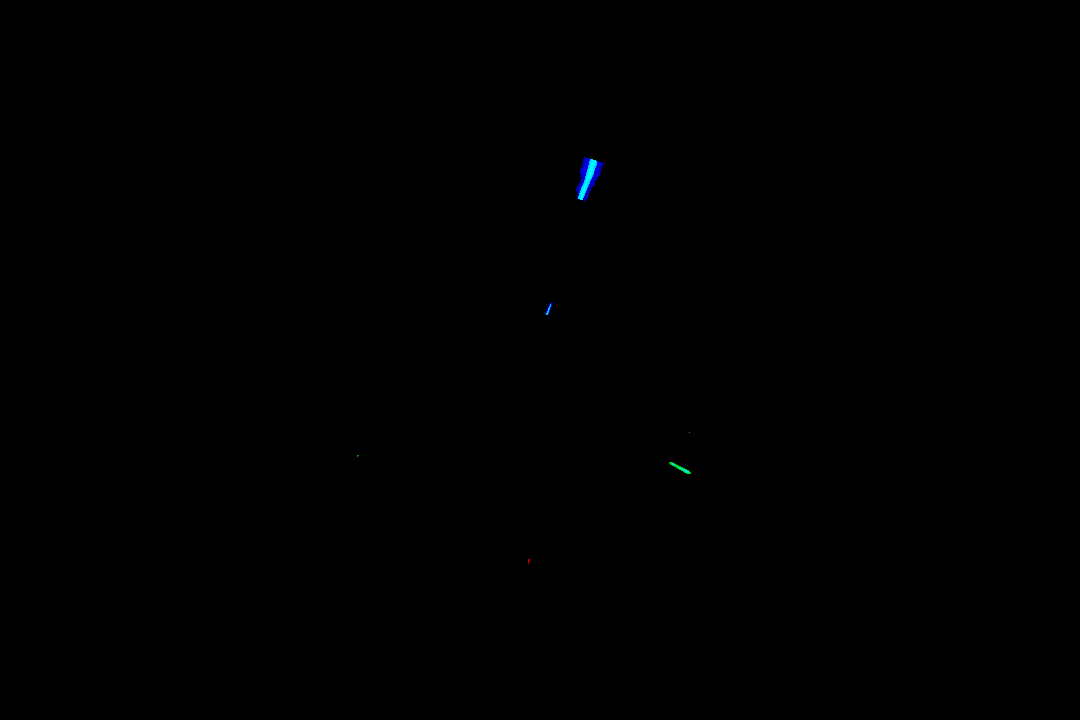

In [10]:
from IPython.display import Image
import cv2 as cv

Pos=robot_Instance.Get_Beacon_Position()
robot_Instance.Set_Robot_Position(Pos[0],Pos[1],Pos[2])
print(Pos[0],Pos[1],Pos[2])
cv.imwrite('T.png',Pos[3])
Image(filename='T.png')


In [ ]:
robot_Instance.Set_Robot_Position(0,250,90,True)
robot_Instance.Set_Robot_Speed(150)
robot_Instance.Set_Max_Try_Single_Goal(12)

Data=robot_Instance.Get_Data_TCP()
if 

In [26]:
robot_Instance.Reverse_Collector()


In [45]:
robot_Instance.Send_Go_To_Coordinate([2000,1500,500,10000,0])

('G0 X2000 Y1500 T10000 R0\r\n', 'M201 H0 S500\r\n', 'M3 H3\r\n')
